Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.














In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38.5, 3, 2, 1, 2, 4, 5, 5, 5, 34], 
                 index=range(1,11))

In [5]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

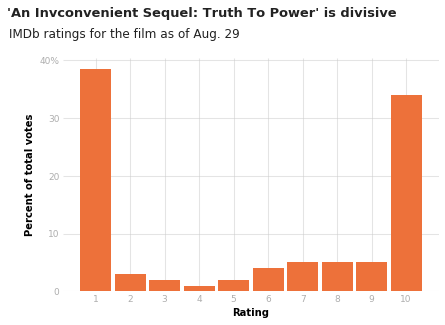

In [20]:
# set the stylesheet for my graphs
plt.style.use('fivethirtyeight')

# Create my figure and axes variables
fig, ax = plt.subplots()

# Plot, color and shape the bars
ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake, color='#ED713A', width=0.9)

# Figure Background Color
fig.set_facecolor(color='None')

# Axes Background Color
ax.set_facecolor(color='None')

# to fix the grid, what I really need to fix
# is the "tick marks"

# set x ticks
ax.set_xticks(range(1,11,1))

# set y ticks
ax.set_yticks(range(0,50,10))

# set y tick labels
ax.set_yticklabels([0,10,20,30,"40%"], fontsize=9, color="#AEAEAE")

ax.set_xticklabels(range(1,11,1), fontsize=9, color="#AEAEAE")


# remove all spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# x label
ax.set_xlabel("Rating", fontsize=10, fontweight='bold')
# y label
ax.set_ylabel("Percent of total votes", fontsize=10, fontweight='bold')

# change the grid alpha and line width
ax.grid(alpha=0.5,lw=1.05)

# Set Title
ax.set_title("'An Invconvenient Sequel: Truth To Power' is divisive", fontsize=13, color='#222222', x=.37, y=1.15, fontweight='bold')

# Subtitle (using the text method and not subtitle on purpose)
ax.text(s="IMDb ratings for the film as of Aug. 29", y=44, x=-1.5, fontsize=12, color='#222222')

# Show the graph, squelch the return output
plt.show()
display(example)

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

In [21]:
# IT'S FREAKING BOB ROSS, TIME TO HAVE HAPPY LITTLE ACCIDENTS
# it's also suprisingly hard to find good writeups for simple graphs
from IPython.display import display, Image

# 5:38 writeup: https://fivethirtyeight.com/features/a-statistical-analysis-of-the-work-of-bob-ross/

url = 'https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png'
example = Image(url=url, width=400)

display(example)

In [143]:
# load data
df=pd.read_csv('elements-by-episode.csv')
df=df.drop(['EPISODE','TITLE'],axis=1)
df.shape

(403, 67)

In [0]:
# make a filterdf to graph out of
df_filter=df
# keep originaldf to normilize out of

#interate over each column and if it hits less then 5 times drop if from the graph
for col in df.columns:
  if df[col].sum() <=5:
    df_filter.drop(col,axis=1,inplace=True)

# should return a series of the sum of all columns that were not filtered out
# this is the data and column names that im going to be graphing
graph_data=df_filter.sum()

In [145]:
# error checking
print(df_filter.shape)
df_filter.iloc[[50,151,33,367]]

# thats good i reduced my column count by almost half

(403, 38)


,BARN,BEACH,BRIDGE,BUSHES,CABIN,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,FENCE,FLOWERS,FOG,FRAMED,GRASS,GUEST,HILLS,LAKE,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,RIVER,ROCKS,SNOW,SNOWY_MOUNTAIN,STEVE_ROSS,STRUCTURE,SUN,TREE,TREES,WATERFALL,WAVES,WINTER
50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
151,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
33,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
367,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0


In [148]:
# make a series with the sorted sum data to be used to normalize
sum_s=df.sum().sort_values(ascending=False)

############################################################
# this right here is one of the things that had me caught up
def normalize(x):
  return (x-sum_s.min())/(sum_s.max()-sum_s.min())
############################################################

final=graph_data.apply(normalize).sort_values(ascending=True)*100
final

BRIDGE              0.000000
CLIFF               0.282486
PALM_TREES          0.564972
STEVE_ROSS          1.129944
NIGHT               1.129944
FLOWERS             1.412429
BARN                2.824859
HILLS               3.107345
GUEST               4.237288
FOG                 4.519774
FENCE               4.802260
BEACH               5.649718
CIRRUS              5.932203
WAVES               7.627119
OCEAN               8.192090
OVAL_FRAME          8.757062
WATERFALL           9.039548
SUN                 9.322034
PATH               11.864407
FRAMED             12.994350
WINTER             17.514124
CABIN              17.514124
SNOW               19.209040
ROCKS              19.774011
STRUCTURE          22.033898
CUMULUS            22.316384
MOUNTAINS          25.988701
SNOWY_MOUNTAIN     28.813559
BUSHES             31.920904
RIVER              33.615819
GRASS              38.135593
LAKE               38.418079
MOUNTAIN           43.220339
CLOUDS             48.587571
CONIFER       

In [157]:
# quick and dirty to see what the data looks like on some bars
#final.plot(kind='barh')
display(example)

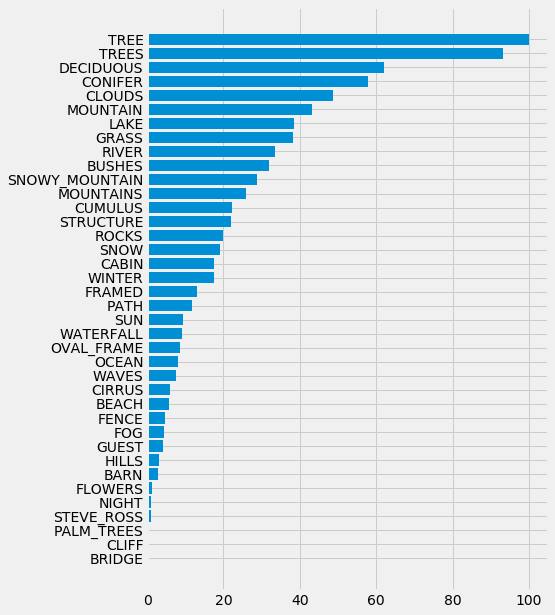

In [160]:
plt.rcParams['figure.figsize']=[6.4,10]
fig,ax=plt.subplots()
ax.barh(final.index,final,height=0.8)
plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here